In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.stats import circvar
from astropy import units as u

In [2]:
def replace_area_name(df, area_key):
# df = dataframe containing an area array column
# area_key = string

    df[area_key] = df[area_key].replace(1, 'V1')
    df[area_key] = df[area_key].replace(2, 'LM')
    df[area_key] = df[area_key].replace(3, 'LI')
    
    return df

# HVA well-fit proportion is much lower than V1
why? do we need more cells for LM LI? adjust cell criteria for HVA?

## 1. Are HVA unresponsive to gratings? 
No. avg resp to ad & tg is similar across areas, but tuning curve fluc & pref ori resp is smaller in HVA



### Response Amplitude by area

In [5]:
temp = loadmat('C:/Users/lan/Documents/repos/inter/plot/CV SNR OSI R2 ori_perc by area - why HVA lack well fit/amp_area.mat')
df = pd.DataFrame(temp['resp_ad'], columns=['resp_ad'])
df['area_ad'] = temp['area_ad']
df['area_ad'] = df['area_ad'].replace(1, 'V1')
df['area_ad'] = df['area_ad'].replace(2, 'LM')
df['area_ad'] = df['area_ad'].replace(3, 'LI')
df.tail()

,resp_ad,area_ad
479,0.010215,LM
480,0.040586,LM
481,0.037092,LM
482,0.035262,LM
483,0.038123,LM


In [6]:
df2 = pd.DataFrame(temp['resp_tg_collapse_ori'], columns=['resp_tg_avg_ori'])
df2['area_tg'] = temp['area_tg']
df2['area_tg'] = df2['area_tg'].replace(1, 'V1')
df2['area_tg'] = df2['area_tg'].replace(2, 'LM')
df2['area_tg'] = df2['area_tg'].replace(3, 'LI')
df2.tail()

,resp_tg_avg_ori,area_tg
407,0.025418,LM
408,0.021595,LM
409,0.058434,LM
410,0.046758,LM
411,0.040096,LM


In [7]:
df.groupby('area_ad', sort=False).describe().reset_index()

area_ad resp_ad                                                              \
            count      mean       std       min       25%       50%       75%   
0      V1   267.0  0.080751  0.069315  0.011885  0.033769  0.057628  0.108478   
1      LM   141.0  0.077834  0.092100  0.010215  0.033665  0.051986  0.092534   
2      LI    76.0  0.068316  0.058048  0.012089  0.029422  0.050297  0.087156   

             
        max  
0  0.486399  
1  0.755541  
2  0.319786

In [8]:
df2.groupby('area_tg', sort=False).describe().reset_index()

area_tg resp_tg_avg_ori                                                    \
                    count      mean       std       min       25%       50%   
0      V1           239.0  0.083117  0.062466  0.009222  0.043842  0.063730   
1      LM           107.0  0.086615  0.092219  0.015696  0.037610  0.057234   
2      LI            66.0  0.078257  0.049079  0.022743  0.042143  0.064019   

                       
        75%       max  
0  0.100160  0.435435  
1  0.103541  0.644160  
2  0.099516  0.241633

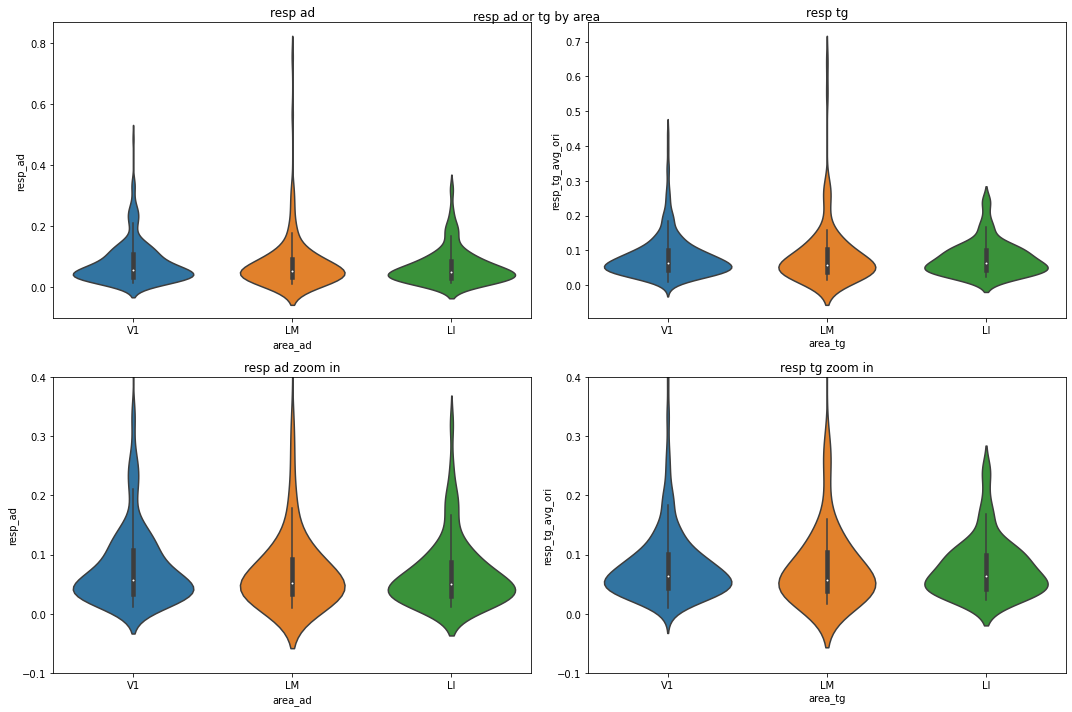

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=False)
fig.suptitle('resp ad or tg by area')

# resp ad
ax = sns.violinplot(ax=axes[0,0], x="area_ad", y="resp_ad", data=df)
axes[0,0].set_title('resp ad')

# resp tg
ax = sns.violinplot(ax=axes[0,1], x="area_tg", y="resp_tg_avg_ori", data=df2)
axes[0,1].set_title('resp tg')

# resp ad zoom in
ax = sns.violinplot(ax=axes[1,0], x="area_ad", y="resp_ad", data=df)
ax.set(ylim=(-0.1, 0.4))
axes[1,0].set_title('resp ad zoom in')

# resp tg zoom in
ax = sns.violinplot(ax=axes[1,1], x="area_tg", y="resp_tg_avg_ori", data=df2)
ax.set(ylim=(-0.1, 0.4))
axes[1,1].set_title('resp tg zoom in')

fig.tight_layout()

### Polar plot of resp_ori by area

In [13]:
ncell_tg = temp['resp_tg'].shape[0]
nori = temp['resp_tg'].shape[1]
resp_tg_cell = []
resp_tg_sorted = np.zeros((ncell_tg, nori))

for icell in np.arange(ncell_tg):
    resp_tg_cell = temp['resp_tg'][icell, :]
    resp_tg_sorted[icell, :] = np.concatenate((resp_tg_cell[np.argmax(resp_tg_cell):len(resp_tg_cell)], resp_tg_cell[0:np.argmax(resp_tg_cell)]))
    
df3 = pd.DataFrame(resp_tg_sorted)
df3['area'] = temp['area_tg']
df3 = replace_area_name(df3, 'area')
df3

,0,1,2,3,4,5,6,7,area
0,0.186297,0.184818,0.095037,0.053145,0.037715,0.041623,0.050704,0.185359,V1
1,0.108755,0.042337,-0.003442,0.007771,-0.021082,-0.017110,0.035048,0.096532,V1
2,0.334310,0.331804,0.054893,0.075347,0.037645,0.046042,0.088307,0.192283,V1
3,0.866983,0.851523,0.237683,0.124013,0.058653,0.050948,0.023531,0.501670,V1
4,0.094991,0.010616,0.023006,0.033687,0.009473,0.022536,0.073898,0.083687,V1
...,...,...,...,...,...,...,...,...,...
407,0.092442,0.050402,0.049153,-0.021308,-0.012517,0.032724,0.009602,0.002845,LM
408,0.059946,-0.015757,0.048349,0.010541,-0.002692,0.018728,0.034506,0.019142,LM
409,0.100901,0.012366,0.078618,0.058513,0.019648,0.067646,0.069631,0.060153,LM
410,0.091941,0.039788,0.039541,0.031566,0.082758,0.014472,0.040642,0.033356,LM


In [14]:
df3.groupby('area', sort=False).count().reset_index()

,area,0,1,2,3,4,5,6,7
0,V1,239,239,239,239,239,239,239,239
1,LM,107,107,107,107,107,107,107,107
2,LI,66,66,66,66,66,66,66,66


In [15]:
df_median = df3.groupby('area', sort=False).median().reset_index()
df_median

,area,0,1,2,3,4,5,6,7
0,V1,0.144829,0.074164,0.049312,0.036211,0.034849,0.035739,0.044892,0.072835
1,LM,0.118889,0.068838,0.051055,0.040134,0.030842,0.039416,0.047986,0.068135
2,LI,0.106541,0.074895,0.054512,0.049813,0.041845,0.056051,0.057500,0.073321


In [16]:
df_mean = df3.groupby('area', sort=False).mean().reset_index()
df_mean

,area,0,1,2,3,4,5,6,7
0,V1,0.189429,0.105789,0.061552,0.050540,0.043605,0.048948,0.060476,0.104599
1,LM,0.159020,0.100637,0.078627,0.058909,0.058579,0.063240,0.077658,0.096254
2,LI,0.135697,0.087246,0.066252,0.053657,0.057660,0.068695,0.070728,0.086117


In [17]:
df3.groupby('area', sort=False).std().reset_index()

,area,0,1,2,3,4,5,6,7
0,V1,0.137807,0.106330,0.062236,0.057600,0.046306,0.062865,0.064945,0.104128
1,LM,0.124312,0.111539,0.096953,0.080087,0.086121,0.084268,0.103900,0.105930
2,LI,0.079208,0.057271,0.051583,0.046024,0.050421,0.054776,0.061219,0.066770


In [18]:
arr_median = df_median.to_numpy()
arr_median = arr_median[0:3, 1:nori+1]

arr_mean = df_mean.to_numpy()
arr_mean = arr_mean[0:3, 1:nori+1]

N = nori * 2
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii_V1_med = np.concatenate((arr_median[0], arr_median[0]))
radii_LM_med = np.concatenate((arr_median[1], arr_median[1]))
radii_LI_med = np.concatenate((arr_median[2], arr_median[2]))
radii_V1_mean = np.concatenate((arr_mean[0], arr_mean[0]))
radii_LM_mean = np.concatenate((arr_mean[1], arr_mean[1]))
radii_LI_mean = np.concatenate((arr_mean[2], arr_mean[2]))
width = np.pi / nori

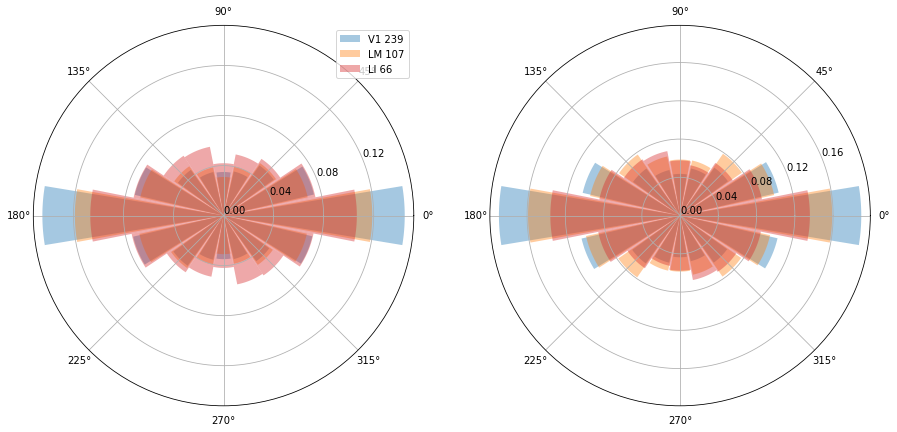

In [19]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(121, projection='polar')
ax.bar(theta, radii_V1_med, width=width/1.2, bottom=0.0, color='C0', alpha=0.4)
ax.bar(theta, radii_LM_med, width=width/1.1, bottom=0.0, color='C1', alpha=0.4)
ax.bar(theta, radii_LI_med, width=width/1.0, bottom=0.0, color='C3', alpha=0.4)
plt.yticks(np.arange(0, 0.16, step=0.04))
ax.legend(['V1 239', 'LM 107', 'LI 66'])

ax = plt.subplot(122, projection='polar')
ax.bar(theta, radii_V1_mean, width=width/1.2, bottom=0.0, color='C0', alpha=0.4)
ax.bar(theta, radii_LM_mean, width=width/1.1, bottom=0.0, color='C1', alpha=0.4)
ax.bar(theta, radii_LI_mean, width=width/1.0, bottom=0.0, color='C3', alpha=0.4)
plt.yticks(np.arange(0, 0.18, step=0.04))
plt.show()